In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, IncrementalPCA, SparsePCA, MiniBatchSparsePCA, KernelPCA, TruncatedSVD, DictionaryLearning, MiniBatchDictionaryLearning, FactorAnalysis, FastICA, NMF, LatentDirichletAllocation
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold

In [ ]:
dataset = 'https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset'
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: biezdietnyidaniil
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


100%|██████████| 6.03M/6.03M [00:00<00:00, 40.9MB/s]

In [ ]:
data = pd.read_csv('/content/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')
data.T

,0,1,2,3,4,5,6,7,8,9,...,253670,253671,253672,253673,253674,253675,253676,253677,253678,253679
Diabetes_012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
HighBP,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
HighChol,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
CholCheck,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0,25.0,30.0,25.0,30.0,24.0,...,25.0,23.0,30.0,42.0,27.0,45.0,18.0,28.0,23.0,25.0
Smoker,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
PhysActivity,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
Fruits,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
data = data.sample(frac = 1)

In [ ]:
X = data.drop(columns = ['Diabetes_012'])[:20000]
y = (data['Diabetes_012'])[:20000]
X = StandardScaler().fit_transform(X)

In [ ]:
scores = []
labels = []
n_components = 7

In [ ]:
#default PCA

X_pca = PCA(n_components=n_components).fit_transform(X)
scores.append(cross_val_score(RandomForestClassifier(), X_pca, y, cv=5, scoring='accuracy'))
labels.append('default PCA')

In [ ]:
# SVD PCA

X_pca_svd = PCA(n_components=n_components, svd_solver='randomized').fit_transform(X)
scores.append(cross_val_score(RandomForestClassifier(), X_pca_svd, y, cv=5, scoring='accuracy'))
labels.append('SVD PCA')

In [ ]:
#IncrementalPCA

X_ipca = IncrementalPCA(n_components=n_components, batch_size=64).fit_transform(X)
scores.append(cross_val_score(RandomForestClassifier(), X_ipca, y, cv=5, scoring='accuracy'))
labels.append('IcrementalPCA')

In [ ]:
#SparsePCA

X_sparse_pca = SparsePCA(n_components=n_components).fit_transform(X)
scores.append(cross_val_score(RandomForestClassifier(), X_sparse_pca, y, cv=5, scoring='accuracy'))
labels.append('SparsePCA')

In [ ]:
#MiniBatchSparsePCA

X_min_batch_pca = MiniBatchSparsePCA(n_components=n_components).fit_transform(X)
scores.append(cross_val_score(RandomForestClassifier(), X_min_batch_pca, y, cv=5, scoring='accuracy'))
labels.append('MiniBatchSparsePCA')

In [ ]:
#KernelPCA

X_kernel = KernelPCA(n_components=n_components, kernel='rbf').fit_transform(X)
scores.append(cross_val_score(RandomForestClassifier(), X_kernel, y, cv=5, scoring='accuracy'))
labels.append('KernelPCA')

In [ ]:
#TruncatedSVD

X_truncated = TruncatedSVD(n_components=n_components).fit_transform(X)
scores.append(cross_val_score(RandomForestClassifier(), X_truncated, y, cv=5, scoring='accuracy'))
labels.append('TruncatedSVD')

In [ ]:
#DictionaryLearning

X_dict_learning = DictionaryLearning(n_components=n_components).fit_transform(X)
scores.append(cross_val_score(RandomForestClassifier(), X_dict_learning, y, cv=5, scoring='accuracy'))
labels.append('DictionaryLearning')

In [ ]:
#MiniBatchDictionaryLearning

X_min_batch_dict = MiniBatchDictionaryLearning(n_components=n_components).fit_transform(X)
scores.append(cross_val_score(RandomForestClassifier(), X_min_batch_dict, y, cv=5, scoring='accuracy'))
labels.append('MiniBatchDictionaryLearning')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2290: FutureWarning: The default value of batch_size will change from 3 to 256 in 1.3.
  warnings.warn(


In [ ]:
#FactorAnalysis

X_factor = FactorAnalysis(n_components=n_components).fit_transform(X)
scores.append(cross_val_score(RandomForestClassifier(), X_factor, y, cv=5, scoring='accuracy'))
labels.append('FactorAnalysis')

In [ ]:
#Independent component analysis

X_ica = FastICA(n_components=n_components).fit_transform(X)
scores.append(cross_val_score(RandomForestClassifier(), X_ica, y, cv=5, scoring='accuracy'))
labels.append('FastICA')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [ ]:
#Non-negative matrix factorization

from sklearn.preprocessing import MinMaxScaler

X_nfactor = NMF(n_components=n_components).fit_transform(MinMaxScaler().fit_transform(X))
scores.append(cross_val_score(RandomForestClassifier(), X_nfactor, y, cv=5, scoring='accuracy'))
labels.append('Non-negative matrix factorization')

In [ ]:
#LatentDirichletAllocation

X_lda = LatentDirichletAllocation(n_components=n_components).fit_transform(MinMaxScaler().fit_transform(X))
scores.append(cross_val_score(RandomForestClassifier(), X_lda, y, cv=5, scoring='accuracy'))
labels.append('LatentDirichletAllocation')

In [ ]:
#LinearDiscriminantAnalysis

X_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X,y)
scores.append(cross_val_score(RandomForestClassifier(), X_lda, y, cv=5, scoring='accuracy'))
labels.append('LinearDiscriminantAnalysis')

In [ ]:
#QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis().fit(X,y)
scores.append(cross_val_score(qda, X, y, cv=5, scoring='accuracy'))
labels.append('QuadraticDiscriminantAnalysis')

In [ ]:
#Creating autoencoder with linear activation functions

input_layer = tf.keras.layers.Input(shape=(X.shape[1],))
encoded = tf.keras.layers.Dense(n_components, activation='linear')(input_layer)
decoded = tf.keras.layers.Dense(X.shape[1], activation='linear')(encoded)

autoencoder = tf.keras.Model(input_layer, decoded)

encoder = tf.keras.Model(input_layer, encoded)

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')

#Fit autoencoder to extract trained encoder
autoencoder.fit(X, X, epochs=20, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/20
125/125 [==============================] - 1s 3ms/step - loss: 1.2356 - val_loss: 0.9044
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 0.7947 - val_loss: 0.6687
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6401 - val_loss: 0.5815
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.5447
Epoch 5/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5508 - val_loss: 0.5277
Epoch 6/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5362 - val_loss: 0.5175
Epoch 7/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5264 - val_loss: 0.5103
Epoch 8/20
125/125 [==============================] - 1s 4ms/step - loss: 0.5188 - val_loss: 0.5044
Epoch 9/20
125/125 [==============================] - 0s 4ms/step - loss: 0.5125 - val_loss: 0.4995
Epoch 10/20
125/125 [==============================] - 0s 3ms/step - loss: 0.5070 - val_loss: 0.4954

In [ ]:
X_lin_enc = encoder.predict(X)

scores.append(cross_val_score(RandomForestClassifier(), X_lin_enc, y, cv=5, scoring='accuracy'))
labels.append('Encoder with linear activation functions')

625/625 [==============================] - 1s 2ms/step


In [ ]:
#Creating autoencoder with non-linear activation functions

input_layer = tf.keras.layers.Input(shape=(X.shape[1],))
encoded = tf.keras.layers.Dense(n_components, activation='tanh')(input_layer)
decoded = tf.keras.layers.Dense(X.shape[1], activation='tanh')(encoded)

autoencoder = tf.keras.Model(input_layer, decoded)

encoder = tf.keras.Model(input_layer, encoded)

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')

#Fit autoencoder to extract trained encoder
autoencoder.fit(X, X, epochs=20, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/20
125/125 [==============================] - 1s 6ms/step - loss: 0.9965 - val_loss: 0.8466
Epoch 2/20
125/125 [==============================] - 1s 4ms/step - loss: 0.8026 - val_loss: 0.7186
Epoch 3/20
125/125 [==============================] - 1s 4ms/step - loss: 0.7085 - val_loss: 0.6565
Epoch 4/20
125/125 [==============================] - 1s 4ms/step - loss: 0.6610 - val_loss: 0.6218
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.6322 - val_loss: 0.5987
Epoch 6/20
125/125 [==============================] - 0s 4ms/step - loss: 0.6120 - val_loss: 0.5817
Epoch 7/20
125/125 [==============================] - 0s 4ms/step - loss: 0.5966 - val_loss: 0.5687
Epoch 8/20
125/125 [==============================] - 1s 4ms/step - loss: 0.5847 - val_loss: 0.5586
Epoch 9/20
125/125 [==============================] - 0s 4ms/step - loss: 0.5756 - val_loss: 0.5508
Epoch 10/20
125/125 [==============================] - 0s 3ms/step - loss: 0.5684 - val_loss: 0.5447

In [ ]:
X_nonlin_enc = encoder.predict(X)

scores.append(cross_val_score(RandomForestClassifier(), X_nonlin_enc, y, cv=5, scoring='accuracy'))
labels.append('Encoder with non-linear activation functions')

625/625 [==============================] - 1s 1ms/step


In [ ]:
#Non_changed

scores.append(cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='accuracy'))
labels.append('Non-changed data')

In [ ]:
accuracy = [score.mean() for score in scores]
for tup in tuple(zip(labels,np.round(accuracy,3))):
  print(tup[0], ' ', tup[1])

default PCA   0.842
SVD PCA   0.841
IcrementalPCA   0.84
SparsePCA   0.842
MiniBatchSparsePCA   0.841
KernelPCA   0.84
TruncatedSVD   0.842
DictionaryLearning   0.817
MiniBatchDictionaryLearning   0.816
FactorAnalysis   0.841
FastICA   0.84
Non-negative matrix factorization   0.835
LatentDirichletAllocation   0.82
LinearDiscriminantAnalysis   0.826
QuadraticDiscriminantAnalysis   0.752
Encoder with linear activation functions   0.841
Encoder with non-linear activation functions   0.84
Non-changed data   0.845


<ipython-input-67-b3030c3ccb02>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  horizontal_bar_plot = sns.barplot(x = 'Accuracy', y = 'Methods', data=df, palette="vlag")


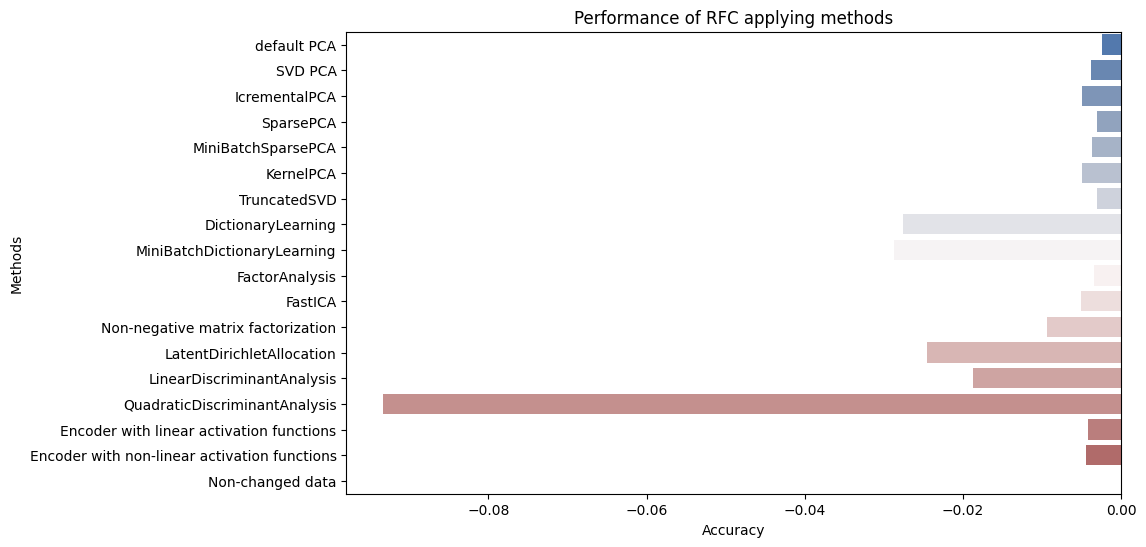

In [ ]:
data = {
    'Methods': labels,
    'Accuracy': accuracy - accuracy[17],
    }
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
horizontal_bar_plot = sns.barplot(x = 'Accuracy', y = 'Methods', data=df, palette="vlag")
plt.title('Performance of RFC applying methods')
plt.xlabel('Accuracy')
plt.ylabel('Methods')
plt.show()